In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
y_train.shape

(50000, 1)

In [18]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
classes[9]

'truck'

In [15]:
def plotsample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])


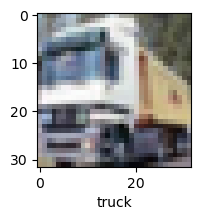

In [21]:
plotsample(x_train,y_train,1)

In [23]:
x_train=x_train/255
x_test=x_test/255

In [25]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 6ms/step - loss: 1.8117 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6228 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5422 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4821 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4304 - accuracy: 0.4966


In [26]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.4818 - accuracy: 0.4750


[1.4817912578582764, 0.4749999940395355]

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred =ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report :\n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 3ms/step
classification report :
               precision    recall  f1-score   support

           0       0.45      0.68      0.54      1000
           1       0.50      0.74      0.59      1000
           2       0.34      0.38      0.36      1000
           3       0.41      0.25      0.31      1000
           4       0.38      0.42      0.40      1000
           5       0.57      0.20      0.29      1000
           6       0.43      0.69      0.53      1000
           7       0.55      0.57      0.56      1000
           8       0.73      0.41      0.52      1000
           9       0.63      0.41      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [38]:
cnn = models.Sequential([
    #cnn
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])



In [40]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 5ms/step - loss: 1.5078 - accuracy: 0.4565
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1576 - accuracy: 0.5940
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0317 - accuracy: 0.6402
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9535 - accuracy: 0.6676
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8870 - accuracy: 0.6909
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8360 - accuracy: 0.7084
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7904 - accuracy: 0.7250
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7542 - accuracy: 0.7357
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7268 - accuracy: 0.7458
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6

In [42]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9223 - accuracy: 0.6919


[0.9223266839981079, 0.6919000148773193]

In [44]:
y_test[:5]
y_test=y_test.reshape(-1,)


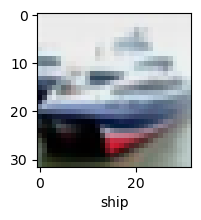

In [45]:
plotsample(x_test,y_test,1)

In [47]:
y_pred=cnn.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [53]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [54]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [55]:
classes[y_classes[1]]

'ship'

In [56]:
print("classification_report:\n",classification_report(y_test,y_classes))

classification_report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.82      0.81      0.81      1000
           2       0.62      0.52      0.57      1000
           3       0.48      0.55      0.51      1000
           4       0.68      0.59      0.63      1000
           5       0.54      0.66      0.59      1000
           6       0.87      0.68      0.76      1000
           7       0.72      0.76      0.74      1000
           8       0.81      0.80      0.81      1000
           9       0.76      0.79      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

